### 여러개 그래프

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#### 1. subplot

In [2]:
from PIL import Image
img1 = Image.open('data/고양이.jpg')
img2 = Image.open('data/삼각함수.png')

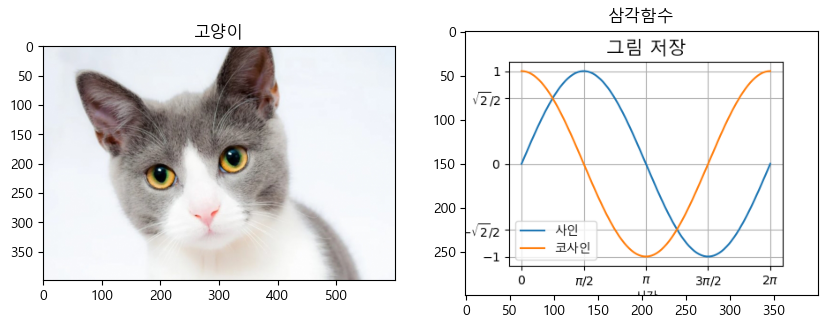

In [3]:
plt.figure(figsize=(10, 4))
plt.subplot(121)        # nrows, ncols, index
plt.imshow(img1), plt.title('고양이')
plt.subplot(1, 2, 2)
plt.imshow(img2), plt.title('삼각함수')
plt.show()

In [17]:
# Iris 각 품종별 sepal_length vs sepal_width
import seaborn as sns
iris = sns.load_dataset('iris')
l_iris = iris.species.unique()
l_iris

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(iris[iris.species == 'setosa'].sepal_length, iris[iris.species == 'setosa'].sepal_width)
plt.title('setosa')
plt.subplot(1, 3, 2)
plt.scatter(iris[iris.species == 'versicolor'].sepal_length, iris[iris.species == 'versicolor'].sepal_width)
plt.title('versicolor')
plt.subplot(1, 3, 3)
plt.scatter(iris[iris.species == 'virginica'].sepal_length, iris[iris.species == 'virginica'].sepal_width)
plt.title('virginica')
plt.show()

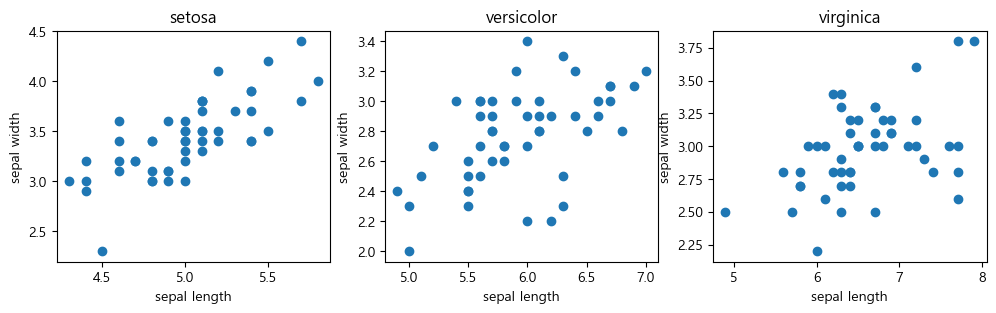

In [19]:
plt.figure(figsize=(12, 3))
for i in range(len(l_iris)):
    plt.subplot(1, 3, i+1)
    plt.scatter(iris[iris.species == l_iris[i]].sepal_length, iris[iris.species == l_iris[i]].sepal_width)
    plt.title(l_iris[i]), plt.xlabel('sepal length'), plt.ylabel('sepal width')
plt.show()

- Anscombe's Quartet

In [20]:
ans = sns.load_dataset('anscombe')
ans.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [21]:
ans.groupby('dataset')['x'].agg(['mean','std'])

,mean,std
dataset,,
I,9.0,3.316625
II,9.0,3.316625
III,9.0,3.316625
IV,9.0,3.316625


In [23]:
ans.pivot_table('y', 'dataset', aggfunc=['mean','std'])

,mean,std
,y,y
dataset,,
I,7.500909,2.031568
II,7.500909,2.031657
III,7.500000,2.030424
IV,7.500909,2.030579


In [24]:
# 회귀식: y = 0.5 * x + 3

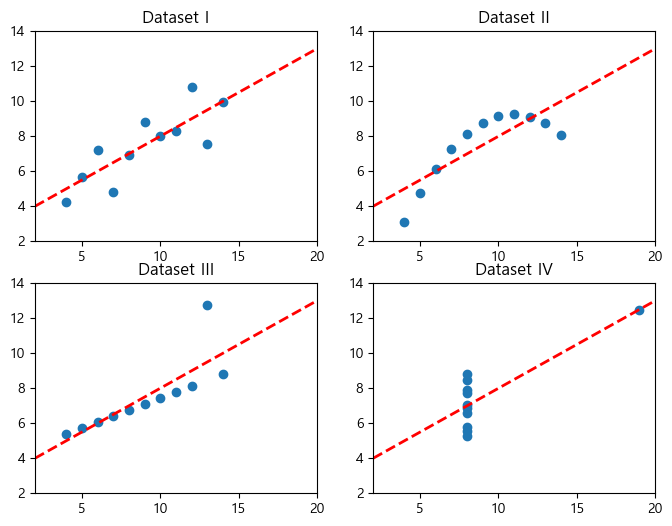

In [28]:
plt.figure(figsize=(8, 6))

for i, roman in enumerate(ans.dataset.unique()):        #['I','II','III','IV']
    ds = ans[ans.dataset == roman]
    plt.subplot(2, 2, i + 1)
    plt.scatter(ds.x, ds.y, marker='o')
    plt.plot([2, 20], [4, 13], 'r--', lw = 2)
    plt.xlim(2, 20), plt.ylim(2, 14)
    plt.title(f'Dataset {roman}')   
plt.show()


- 2. subplots

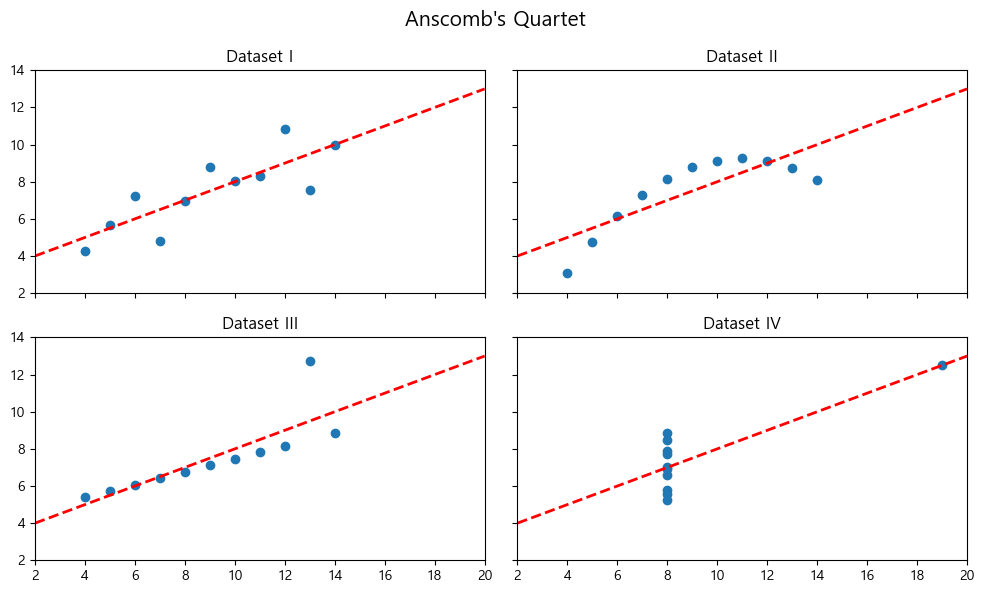

In [31]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)

for i, roman in enumerate(ans.dataset.unique()):        #['I','II','III','IV']
    ds = ans[ans.dataset == roman]
    ax = axes[i // 2, i % 2]            # 행, 열 인덱스
    ax.scatter(ds.x, ds.y, marker='o')
    ax.plot([2, 20], [4, 13], 'r--', lw = 2)
    ax.set_xlim(2, 20), ax.set_ylim(2, 14)
    ax.set_title(f'Dataset {roman}')   
fig.suptitle("Anscomb's Quartet", fontsize = 15)
plt.tight_layout()
plt.show()